# Project: Predict VWAP (Volume Weighted Average Price)

## Strategy:
1.	Data Collection
2.	Data Cleaning/Pre-processing
    *	For time series data first make the date as index of your data frame
    *	Dealing with Null Values
3.	Exploratory Data Analysis
4.	Feature Engineering 
    *	Feature Encoding 
        *	Select important feature
        *	Rolling them by mean and std
    *	Feature Selection
        *	Select the dependent (y) and independent (x) variable 
5.	Applying Algorithm (Auto AriMa)
    *	Split the data set into training and testing
    *	Create model, fit (training), predict (testing)
    *	Check accuracy
    *	Save the model in plk file


In [1]:
import pandas as pd
import numpy as np

#for ignoring warning
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

# to see all the columns
#pd.set_option('display.max_columns',35)

In [2]:
# For time series data first make the date as index of your data frame
df=pd.read_csv('03 Stock Price.csv', index_col = "Date")
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


## Step 2: Data Cleaning

### Dealing with null values

In [3]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [4]:
df.dropna(inplace = True)
df.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [5]:
# making copy of our df
data = df.copy()
data.head(2)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.0,636.5,616.0,627.0,631.85,627.01,6894,4.322621e+11,1416.0,3427.0,0.4971
2011-06-02,BAJFINANCE,EQ,631.85,625.0,638.9,620.0,634.0,633.45,636.04,2769,1.761205e+11,432.0,1718.0,0.6204


## Step 3: Exploratory Data Analysis

<AxesSubplot:xlabel='Date'>

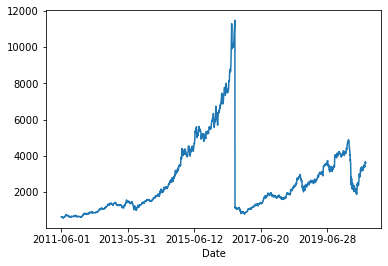

In [6]:
df['VWAP'].plot()

## Step:4 Feature Engineering

In [7]:
# Selecting columns for training
lag_features=['High','Low','Volume','Turnover','Trades']

In [8]:
# Rolling the column with their mean
window1=3
window2=7
for feature in lag_features:
    data[feature+'rolling_mean_3']=data[feature].rolling(window=window1).mean()
    data[feature+'rolling_mean_7']=data[feature].rolling(window=window2).mean()
data.head(2)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Turnoverrolling_mean_3,Turnoverrolling_mean_7,Tradesrolling_mean_3,Tradesrolling_mean_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.0,636.5,616.0,627.0,631.85,627.01,6894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.0,638.9,620.0,634.0,633.45,636.04,2769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
pd.set_option('display.max_columns',24)
data.head(2)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Turnoverrolling_mean_3,Turnoverrolling_mean_7,Tradesrolling_mean_3,Tradesrolling_mean_7
Date,,,,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.0,636.5,616.0,627.0,631.85,627.01,6894,4.322621e+11,1416.0,3427.0,0.4971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.0,638.9,620.0,634.0,633.45,636.04,2769,1.761205e+11,432.0,1718.0,0.6204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Rolling the column with their std
for feature in lag_features:
    data[feature+'rolling_std_3']=data[feature].rolling(window=window1).std()
    data[feature+'rolling_std_7']=data[feature].rolling(window=window2).std()
data.head(2)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,...,Tradesrolling_mean_3,Tradesrolling_mean_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.0,636.5,616.0,627.0,631.85,627.01,6894,4.322621e+11,1416.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.0,638.9,620.0,634.0,633.45,636.04,2769,1.761205e+11,432.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
pd.set_option('display.max_columns',34)
data.head(2)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Turnoverrolling_mean_3,Turnoverrolling_mean_7,Tradesrolling_mean_3,Tradesrolling_mean_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.0,636.5,616.0,627.0,631.85,627.01,6894,4.322621e+11,1416.0,3427.0,0.4971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.0,638.9,620.0,634.0,633.45,636.04,2769,1.761205e+11,432.0,1718.0,0.6204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        2
Highrolling_mean_7        6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Tradesrolling_mean_3      2
Tradesrolling_mean_7      6
Highrolling_std_3         2
Highrolling_std_7         6
Lowrolling_std_3          2
Lowrolling_std_7          6
Volumerolling_std_3       2
Volumerolling_std_7       6
Turnoverrolling_std_3     2
Turnoverrolling_std_7     6
Tradesrolling_std_3       2
Tradesrolling_std_7       6
dtype: int64

In [13]:
data.dropna(inplace=True)

### Feture Selection

In [14]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [15]:
ind_features=['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7']

## Step 5: Applying Algorithm

### Split the data set into training and testing

In [16]:
training_data=data[0:1800]
test_data=data[1800:]

In [17]:
#pip install pmdarima

In [18]:
# Lower AIC value is better
from pmdarima import auto_arima
model=auto_arima(y=training_data['VWAP'],exogenous=training_data[ind_features],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=20931.540, Time=5.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20925.228, Time=2.71 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20926.351, Time=2.78 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=20926.323, Time=3.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=32616.913, Time=2.38 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=20929.237, Time=3.62 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 20.036 seconds


In [19]:
# training
model.fit(training_data['VWAP'],training_data[ind_features])

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [20]:
# predicting
forecast=model.predict(n_periods=len(test_data), exogenous=test_data[ind_features])

C:\Users\Yasin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:xlabel='Date'>

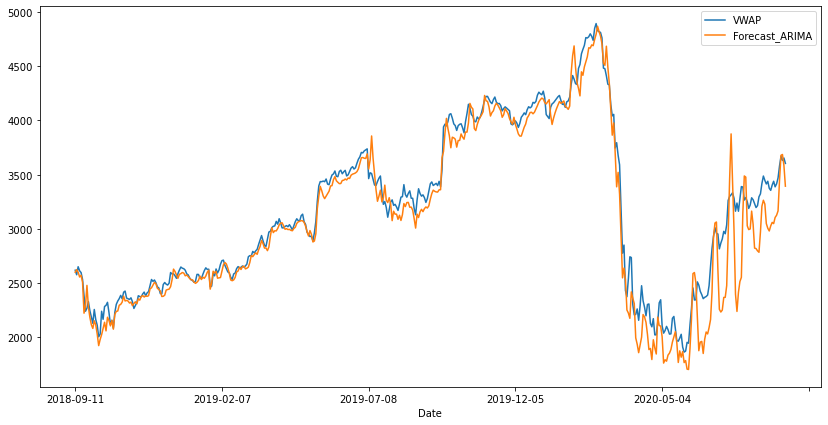

In [21]:
# Compairing
test_data['Forecast_ARIMA']=forecast
test_data[['VWAP','Forecast_ARIMA']].plot(figsize=(14,7))

### Checking Accuracy of our model

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
np.sqrt(mean_squared_error(test_data['VWAP'],test_data['Forecast_ARIMA']))

187.73748502260466

In [23]:
mean_absolute_error(test_data['VWAP'],test_data['Forecast_ARIMA'])

124.63013335458231

### Save the model to reuse it again

In [24]:
import pickle
# open a file, where you want to store the data
file=open('03 Stock Price.pkl','wb')
# dump information to that file
pickle.dump(forecast,file)